In [1]:
import os
from keras.models import load_model

Using TensorFlow backend.


In [2]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto(device_count = {'CPU' : 1, 'GPU' : 1}) #device_count = {'CPU' : 1, 'GPU' : 1}
config.gpu_options.allow_growth = True #dynamically grow the memory used on the GPU
config.log_device_placement = True # to log device placement (onn which device the operation ran)

sess = tf.Session(config=config)
set_session(sess) # set this Tensorflow session as the default session for Keras

In [3]:
base_dir = '/workspace/dataset/MyExamples/dogs-vs-cafts-original/cats_and_dogs_small'
test_dir = os.path.join(base_dir, 'test')
test_cats_dir = os.path.join(test_dir, 'cats')

In [4]:

model = load_model('cats_and_dogs_small_1.h5')
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['acc'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.5/dist-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [5]:
#predicting images
#img = image.load_img()

Found 1000 images belonging to 2 classes.
(1, 150, 150, 3)
This should be cat
The computer thinks it is cat


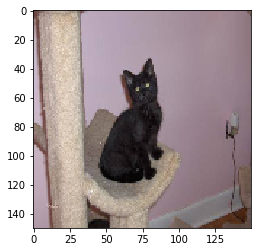

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import image
from keras.preprocessing.image import ImageDataGenerator

#img = image.imread(os.path.join(test_cats_dir, 'cat.1501.jpg'))

#predicting images
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(150,150), 
    batch_size = 1,
    class_mode='binary')

categerators = ['cat','dog']

for test_batch, labels_batch in test_generator:
    print(test_batch.shape)
    imgplot = plt.imshow(test_batch[0])
    print("This should be", categerators[int(labels_batch)])
    predict_label=model.predict(test_batch)
    #print("The computer think it is ", predict_label[0][0])
    print("The computer thinks it is", categerators[int(round(predict_label[0][0]))])
    break
plt.show()

